## Imports

In [1]:
import sys 
import numpy as np 
import matplotlib.pyplot as plt


import torch
import torchvision 
import torch.optim as optim
import torch.nn as nn

import models

print("Python: %s" % sys.version)
print("Pytorch: %s" % torch.__version__)

Python: 3.6.5 (default, Jun 21 2018, 23:07:39) 
[GCC 5.4.0 20160609]
Pytorch: 0.4.0


## Hyperparameters

In [2]:
n_epochs = 30
batch_size = 128
lr = 0.001

## Load CIFAR10

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


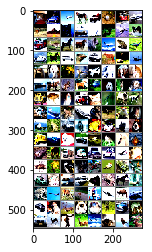

In [3]:
# define series of transforms to pre process images 
transform = torchvision.transforms.Compose([
    #torchvision.transforms.Pad(2),
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
    

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


# load training set 
cifar10_trainset = torchvision.datasets.CIFAR10('datasets/', train=True, transform=transform, download=True)
cifar10_trainloader = torch.utils.data.DataLoader(cifar10_trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# load test set 
cifar10_testset = torchvision.datasets.CIFAR10('datasets/', train=False, transform=transform, download=True)
cifar10_testloader = torch.utils.data.DataLoader(cifar10_testset, batch_size=32, shuffle=False, num_workers=2)

# helper function to unnormalize and plot image 
def imshow(img):
    img = np.array(img)
    img = img / 2 + 0.5
    img = np.moveaxis(img, 0, -1)
    plt.imshow(img)
    
# display sample from dataset 
imgs,labels = iter(cifar10_trainloader).next()
imshow(torchvision.utils.make_grid(imgs))  

## Model Architecture

In [4]:
# determine device to run network on (runs on gpu if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


multi_layer_perceptron = models.cnn(3, 10, 64)


# load the torchvision resnet18 implementation 
resnet18 = torchvision.models.resnet18(num_classes=10)
# resnet fix for cifar10 image size 
resnet18.avgpool = nn.AvgPool2d(2, stride=1)

#alexnet = torchvision.models.alexnet()


vgg16 = torchvision.models.vgg16(num_classes=10)
# vgg16 fix for cifar10 image size 
vgg16.classifier = nn.Sequential(
            nn.Linear(512, 64),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(64, 64),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(64, 10),
        )
#squeezenet = torchvision.models.squeezenet1_0()
#densenet = torchvision.models.densenet161()
#inception = torchvision.models.inception_v3(num_classes=10)

#net = resnet18.to(device)
#net = vgg16.to(device)
net = multi_layer_perceptron.to(device)
net.apply(models.weights_init)

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=lr)

In [5]:
def eval_net(): 
    
    
    class_correct = np.zeros(10)
    class_total = np.zeros(10)
    total = 0
    correct = 0
    with torch.no_grad():
        net.eval()
        for i, (imgs, lbls) in enumerate(cifar10_testloader):
            
            imgs, lbls = imgs.to(device), lbls.to(device)
            
            output = net(imgs)
            
            predicted = output.argmax(dim=1)
            
            total += imgs.size(0)
            correct += predicted.eq(lbls).sum().item()
            
            
            for prediction, lbl in zip(predicted, lbls): 
            
                class_correct[lbl] += prediction == lbl
                class_total[lbl] += 1 
    
    print('\n')
    for i in range(10):
        print('Accuracy of %s : %.2f %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
    print("\nTotal accuracy = %.2f %%" % (100*(correct/total)) )

## Training 

[0/30][0/391] loss = 5.930341
[0/30][1/391] loss = 2.875741
[0/30][2/391] loss = 2.908727
[0/30][3/391] loss = 4.178641
[0/30][4/391] loss = 2.837456
[0/30][5/391] loss = 2.610999
[0/30][6/391] loss = 2.209391
[0/30][7/391] loss = 2.699301
[0/30][8/391] loss = 2.298769
[0/30][9/391] loss = 2.385596
[0/30][10/391] loss = 2.184362
[0/30][11/391] loss = 2.235622
[0/30][12/391] loss = 2.423391
[0/30][13/391] loss = 2.476717
[0/30][14/391] loss = 2.163664
[0/30][15/391] loss = 2.131999
[0/30][16/391] loss = 1.936797
[0/30][17/391] loss = 1.990045
[0/30][18/391] loss = 1.649314
[0/30][19/391] loss = 2.362889
[0/30][20/391] loss = 2.037687
[0/30][21/391] loss = 2.234673
[0/30][22/391] loss = 2.154790
[0/30][23/391] loss = 1.798484
[0/30][24/391] loss = 1.852090
[0/30][25/391] loss = 1.775621
[0/30][26/391] loss = 2.054424
[0/30][27/391] loss = 1.800718
[0/30][28/391] loss = 1.610358
[0/30][29/391] loss = 1.664097
[0/30][30/391] loss = 1.881416
[0/30][31/391] loss = 1.754649
[0/30][32/391] los

[0/30][268/391] loss = 1.089403
[0/30][269/391] loss = 1.057176
[0/30][270/391] loss = 1.308886
[0/30][271/391] loss = 1.366009
[0/30][272/391] loss = 1.140648
[0/30][273/391] loss = 1.259204
[0/30][274/391] loss = 1.028879
[0/30][275/391] loss = 1.196845
[0/30][276/391] loss = 1.198119
[0/30][277/391] loss = 1.178759
[0/30][278/391] loss = 0.934009
[0/30][279/391] loss = 1.201438
[0/30][280/391] loss = 1.289067
[0/30][281/391] loss = 1.296059
[0/30][282/391] loss = 1.085827
[0/30][283/391] loss = 1.083685
[0/30][284/391] loss = 1.417178
[0/30][285/391] loss = 1.193573
[0/30][286/391] loss = 1.118606
[0/30][287/391] loss = 1.073463
[0/30][288/391] loss = 1.144337
[0/30][289/391] loss = 1.136879
[0/30][290/391] loss = 1.244114
[0/30][291/391] loss = 1.340821
[0/30][292/391] loss = 1.149493
[0/30][293/391] loss = 1.042183
[0/30][294/391] loss = 0.943280
[0/30][295/391] loss = 1.077432
[0/30][296/391] loss = 1.134673
[0/30][297/391] loss = 1.006445
[0/30][298/391] loss = 0.949124
[0/30][2

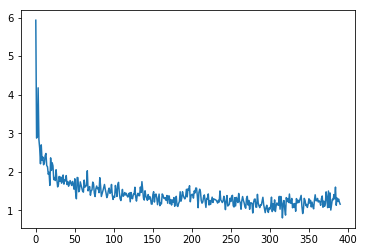

[1/30][0/391] loss = 1.163690
[1/30][1/391] loss = 1.238901
[1/30][2/391] loss = 0.943442
[1/30][3/391] loss = 1.155980
[1/30][4/391] loss = 0.947743
[1/30][5/391] loss = 0.915388
[1/30][6/391] loss = 1.285228
[1/30][7/391] loss = 0.945648
[1/30][8/391] loss = 1.001214
[1/30][9/391] loss = 0.983621
[1/30][10/391] loss = 1.191802
[1/30][11/391] loss = 0.997584
[1/30][12/391] loss = 1.121889
[1/30][13/391] loss = 1.026977
[1/30][14/391] loss = 1.004032
[1/30][15/391] loss = 1.082339
[1/30][16/391] loss = 1.064215
[1/30][17/391] loss = 1.001623
[1/30][18/391] loss = 1.148027
[1/30][19/391] loss = 0.845571
[1/30][20/391] loss = 1.207772
[1/30][21/391] loss = 1.058615
[1/30][22/391] loss = 0.857576
[1/30][23/391] loss = 0.938523
[1/30][24/391] loss = 1.138386
[1/30][25/391] loss = 0.954895
[1/30][26/391] loss = 1.092609
[1/30][27/391] loss = 0.956629
[1/30][28/391] loss = 0.871438
[1/30][29/391] loss = 0.972458
[1/30][30/391] loss = 1.101472
[1/30][31/391] loss = 0.828442
[1/30][32/391] los

[1/30][266/391] loss = 1.052685
[1/30][267/391] loss = 1.123510
[1/30][268/391] loss = 0.982922
[1/30][269/391] loss = 0.842687
[1/30][270/391] loss = 1.010357
[1/30][271/391] loss = 1.069507
[1/30][272/391] loss = 1.157097
[1/30][273/391] loss = 0.892121
[1/30][274/391] loss = 1.167410
[1/30][275/391] loss = 1.064144
[1/30][276/391] loss = 1.066860
[1/30][277/391] loss = 1.171860
[1/30][278/391] loss = 0.902403
[1/30][279/391] loss = 0.992734
[1/30][280/391] loss = 1.045447
[1/30][281/391] loss = 1.250845
[1/30][282/391] loss = 1.198140
[1/30][283/391] loss = 1.166056
[1/30][284/391] loss = 0.925153
[1/30][285/391] loss = 0.863826
[1/30][286/391] loss = 1.133041
[1/30][287/391] loss = 1.120602
[1/30][288/391] loss = 0.853289
[1/30][289/391] loss = 0.910490
[1/30][290/391] loss = 0.840832
[1/30][291/391] loss = 0.934669
[1/30][292/391] loss = 0.890077
[1/30][293/391] loss = 1.151795
[1/30][294/391] loss = 0.789334
[1/30][295/391] loss = 0.866427
[1/30][296/391] loss = 0.875870
[1/30][2

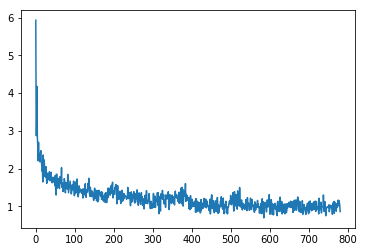

[2/30][0/391] loss = 0.912871
[2/30][1/391] loss = 0.971763
[2/30][2/391] loss = 0.978161
[2/30][3/391] loss = 0.745217
[2/30][4/391] loss = 0.950658
[2/30][5/391] loss = 0.966645
[2/30][6/391] loss = 0.979441
[2/30][7/391] loss = 1.035882
[2/30][8/391] loss = 0.894528
[2/30][9/391] loss = 1.057283
[2/30][10/391] loss = 1.002461
[2/30][11/391] loss = 0.829638
[2/30][12/391] loss = 0.899330
[2/30][13/391] loss = 0.947673
[2/30][14/391] loss = 1.084355
[2/30][15/391] loss = 0.919635
[2/30][16/391] loss = 0.971490
[2/30][17/391] loss = 0.878191
[2/30][18/391] loss = 0.952816
[2/30][19/391] loss = 1.002924
[2/30][20/391] loss = 1.047401
[2/30][21/391] loss = 0.884814
[2/30][22/391] loss = 0.702505
[2/30][23/391] loss = 0.838268
[2/30][24/391] loss = 0.765524
[2/30][25/391] loss = 0.676667
[2/30][26/391] loss = 0.902232
[2/30][27/391] loss = 0.969107
[2/30][28/391] loss = 0.780350
[2/30][29/391] loss = 1.002917
[2/30][30/391] loss = 0.857314
[2/30][31/391] loss = 0.697365
[2/30][32/391] los

[2/30][270/391] loss = 0.839761
[2/30][271/391] loss = 0.794918
[2/30][272/391] loss = 0.893749
[2/30][273/391] loss = 0.898510
[2/30][274/391] loss = 0.913563
[2/30][275/391] loss = 0.863684
[2/30][276/391] loss = 0.736899
[2/30][277/391] loss = 0.738738
[2/30][278/391] loss = 0.726755
[2/30][279/391] loss = 1.008707
[2/30][280/391] loss = 0.908943
[2/30][281/391] loss = 0.900281
[2/30][282/391] loss = 0.868894
[2/30][283/391] loss = 1.053615
[2/30][284/391] loss = 0.755987
[2/30][285/391] loss = 0.781408
[2/30][286/391] loss = 1.159265
[2/30][287/391] loss = 0.770149
[2/30][288/391] loss = 0.939388
[2/30][289/391] loss = 0.908670
[2/30][290/391] loss = 0.926405
[2/30][291/391] loss = 0.912508
[2/30][292/391] loss = 0.942647
[2/30][293/391] loss = 0.782634
[2/30][294/391] loss = 0.642296
[2/30][295/391] loss = 1.004085
[2/30][296/391] loss = 0.867558
[2/30][297/391] loss = 1.029371
[2/30][298/391] loss = 0.880023
[2/30][299/391] loss = 1.043654
[2/30][300/391] loss = 0.843288
[2/30][3

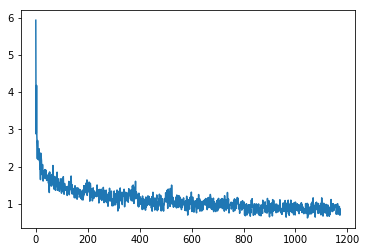

[3/30][0/391] loss = 0.893922
[3/30][1/391] loss = 0.697309
[3/30][2/391] loss = 0.707790
[3/30][3/391] loss = 0.869076
[3/30][4/391] loss = 0.947365
[3/30][5/391] loss = 0.962626
[3/30][6/391] loss = 0.580453
[3/30][7/391] loss = 0.608956
[3/30][8/391] loss = 0.857900
[3/30][9/391] loss = 0.902779
[3/30][10/391] loss = 0.746888
[3/30][11/391] loss = 0.934673
[3/30][12/391] loss = 0.681538
[3/30][13/391] loss = 0.780725
[3/30][14/391] loss = 0.787862
[3/30][15/391] loss = 0.727648
[3/30][16/391] loss = 0.715106
[3/30][17/391] loss = 0.681799
[3/30][18/391] loss = 0.765292
[3/30][19/391] loss = 0.757604
[3/30][20/391] loss = 0.666425
[3/30][21/391] loss = 0.730293
[3/30][22/391] loss = 0.684045
[3/30][23/391] loss = 0.732064
[3/30][24/391] loss = 0.813144
[3/30][25/391] loss = 0.840840
[3/30][26/391] loss = 0.724979
[3/30][27/391] loss = 0.793123
[3/30][28/391] loss = 1.023500
[3/30][29/391] loss = 0.791927
[3/30][30/391] loss = 0.749360
[3/30][31/391] loss = 0.834244
[3/30][32/391] los

[3/30][260/391] loss = 0.727278
[3/30][261/391] loss = 0.686568
[3/30][262/391] loss = 0.695758
[3/30][263/391] loss = 0.693670
[3/30][264/391] loss = 0.715632
[3/30][265/391] loss = 0.622944
[3/30][266/391] loss = 0.839173
[3/30][267/391] loss = 0.803341
[3/30][268/391] loss = 0.783069
[3/30][269/391] loss = 0.587822
[3/30][270/391] loss = 0.603781
[3/30][271/391] loss = 0.678411
[3/30][272/391] loss = 0.542669
[3/30][273/391] loss = 0.736458
[3/30][274/391] loss = 0.743287
[3/30][275/391] loss = 0.746611
[3/30][276/391] loss = 0.669615
[3/30][277/391] loss = 0.729589
[3/30][278/391] loss = 0.912205
[3/30][279/391] loss = 0.933665
[3/30][280/391] loss = 0.918190
[3/30][281/391] loss = 0.822272
[3/30][282/391] loss = 0.723326
[3/30][283/391] loss = 0.644938
[3/30][284/391] loss = 0.736120
[3/30][285/391] loss = 0.749419
[3/30][286/391] loss = 0.834004
[3/30][287/391] loss = 0.740175
[3/30][288/391] loss = 0.807829
[3/30][289/391] loss = 0.738683
[3/30][290/391] loss = 0.600727
[3/30][2

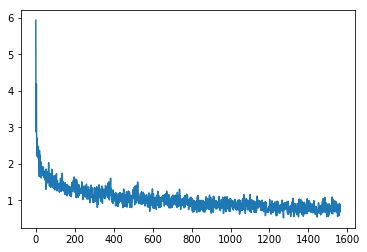

[4/30][0/391] loss = 0.668743
[4/30][1/391] loss = 0.897365
[4/30][2/391] loss = 0.755571
[4/30][3/391] loss = 0.719132
[4/30][4/391] loss = 0.820031
[4/30][5/391] loss = 0.667919
[4/30][6/391] loss = 0.791528
[4/30][7/391] loss = 0.739269
[4/30][8/391] loss = 0.643391
[4/30][9/391] loss = 0.660002
[4/30][10/391] loss = 0.708410
[4/30][11/391] loss = 0.996626
[4/30][12/391] loss = 0.647880
[4/30][13/391] loss = 0.748130
[4/30][14/391] loss = 0.637349
[4/30][15/391] loss = 0.730608
[4/30][16/391] loss = 0.681423
[4/30][17/391] loss = 0.583227
[4/30][18/391] loss = 0.907057
[4/30][19/391] loss = 0.788344
[4/30][20/391] loss = 0.714074
[4/30][21/391] loss = 0.779688
[4/30][22/391] loss = 0.720754
[4/30][23/391] loss = 0.788948
[4/30][24/391] loss = 0.607157
[4/30][25/391] loss = 0.853100
[4/30][26/391] loss = 0.810258
[4/30][27/391] loss = 0.736524
[4/30][28/391] loss = 0.556865
[4/30][29/391] loss = 0.759911
[4/30][30/391] loss = 0.875065
[4/30][31/391] loss = 0.574660
[4/30][32/391] los

[4/30][261/391] loss = 0.624846
[4/30][262/391] loss = 0.699560
[4/30][263/391] loss = 0.685397
[4/30][264/391] loss = 0.659756
[4/30][265/391] loss = 0.739142
[4/30][266/391] loss = 0.756306
[4/30][267/391] loss = 0.674993
[4/30][268/391] loss = 0.583399
[4/30][269/391] loss = 0.822605
[4/30][270/391] loss = 0.881507
[4/30][271/391] loss = 0.648060
[4/30][272/391] loss = 0.641226
[4/30][273/391] loss = 0.490919
[4/30][274/391] loss = 0.693568
[4/30][275/391] loss = 0.634257
[4/30][276/391] loss = 0.708644
[4/30][277/391] loss = 0.901115
[4/30][278/391] loss = 0.757865
[4/30][279/391] loss = 0.826991
[4/30][280/391] loss = 0.577948
[4/30][281/391] loss = 0.730308
[4/30][282/391] loss = 0.554488
[4/30][283/391] loss = 0.691127
[4/30][284/391] loss = 0.675186
[4/30][285/391] loss = 0.786229
[4/30][286/391] loss = 0.705448
[4/30][287/391] loss = 0.796739
[4/30][288/391] loss = 0.671178
[4/30][289/391] loss = 0.686963
[4/30][290/391] loss = 0.746900
[4/30][291/391] loss = 0.739755
[4/30][2

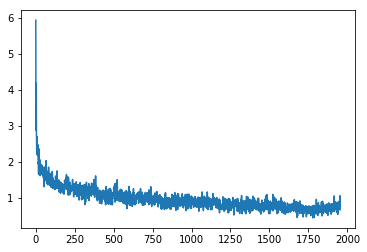

[5/30][0/391] loss = 0.718055
[5/30][1/391] loss = 0.557996
[5/30][2/391] loss = 0.640139
[5/30][3/391] loss = 0.627513
[5/30][4/391] loss = 0.512173
[5/30][5/391] loss = 0.610685
[5/30][6/391] loss = 0.629734
[5/30][7/391] loss = 0.560398
[5/30][8/391] loss = 0.653228
[5/30][9/391] loss = 0.687836
[5/30][10/391] loss = 0.637190
[5/30][11/391] loss = 0.663837
[5/30][12/391] loss = 0.512631
[5/30][13/391] loss = 0.734057
[5/30][14/391] loss = 0.625741
[5/30][15/391] loss = 0.628711
[5/30][16/391] loss = 0.596137
[5/30][17/391] loss = 0.684667
[5/30][18/391] loss = 0.532988
[5/30][19/391] loss = 0.654047
[5/30][20/391] loss = 0.737895
[5/30][21/391] loss = 0.712291
[5/30][22/391] loss = 0.692167
[5/30][23/391] loss = 0.637464
[5/30][24/391] loss = 0.666945
[5/30][25/391] loss = 0.683117
[5/30][26/391] loss = 0.711870
[5/30][27/391] loss = 0.550710
[5/30][28/391] loss = 0.794005
[5/30][29/391] loss = 0.571023
[5/30][30/391] loss = 0.524840
[5/30][31/391] loss = 0.635176
[5/30][32/391] los

[5/30][279/391] loss = 0.832509
[5/30][280/391] loss = 0.574983
[5/30][281/391] loss = 0.630535
[5/30][282/391] loss = 0.444452
[5/30][283/391] loss = 0.587721
[5/30][284/391] loss = 0.774760
[5/30][285/391] loss = 0.743272
[5/30][286/391] loss = 0.631211
[5/30][287/391] loss = 0.753317
[5/30][288/391] loss = 0.654716
[5/30][289/391] loss = 0.493411
[5/30][290/391] loss = 0.565194
[5/30][291/391] loss = 0.608411
[5/30][292/391] loss = 0.688929
[5/30][293/391] loss = 0.474230
[5/30][294/391] loss = 0.550145
[5/30][295/391] loss = 0.629658
[5/30][296/391] loss = 0.724431
[5/30][297/391] loss = 0.896259
[5/30][298/391] loss = 0.647988
[5/30][299/391] loss = 0.579756
[5/30][300/391] loss = 0.672076
[5/30][301/391] loss = 1.004969
[5/30][302/391] loss = 0.850757
[5/30][303/391] loss = 0.751237
[5/30][304/391] loss = 0.688648
[5/30][305/391] loss = 0.796262
[5/30][306/391] loss = 0.708371
[5/30][307/391] loss = 0.900914
[5/30][308/391] loss = 0.673159
[5/30][309/391] loss = 0.602049
[5/30][3

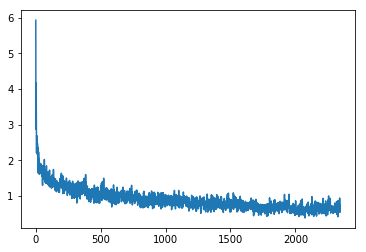

[6/30][0/391] loss = 0.463332
[6/30][1/391] loss = 0.466966
[6/30][2/391] loss = 0.708481
[6/30][3/391] loss = 0.541483
[6/30][4/391] loss = 0.543982
[6/30][5/391] loss = 0.483288
[6/30][6/391] loss = 0.523815
[6/30][7/391] loss = 0.548375
[6/30][8/391] loss = 0.644072
[6/30][9/391] loss = 0.607782
[6/30][10/391] loss = 0.457363
[6/30][11/391] loss = 0.419656
[6/30][12/391] loss = 0.610864
[6/30][13/391] loss = 0.601653
[6/30][14/391] loss = 0.636503
[6/30][15/391] loss = 0.559871
[6/30][16/391] loss = 0.458602
[6/30][17/391] loss = 0.569101
[6/30][18/391] loss = 0.590960
[6/30][19/391] loss = 0.645369
[6/30][20/391] loss = 0.505933
[6/30][21/391] loss = 0.385213
[6/30][22/391] loss = 0.448932
[6/30][23/391] loss = 0.519339
[6/30][24/391] loss = 0.489326
[6/30][25/391] loss = 0.572847
[6/30][26/391] loss = 0.421526
[6/30][27/391] loss = 0.552824
[6/30][28/391] loss = 0.512535
[6/30][29/391] loss = 0.695780
[6/30][30/391] loss = 0.569249
[6/30][31/391] loss = 0.572076
[6/30][32/391] los

[6/30][269/391] loss = 0.614411
[6/30][270/391] loss = 0.635911
[6/30][271/391] loss = 0.582356
[6/30][272/391] loss = 0.735150
[6/30][273/391] loss = 0.761204
[6/30][274/391] loss = 0.620646
[6/30][275/391] loss = 0.545872
[6/30][276/391] loss = 0.667097
[6/30][277/391] loss = 0.573541
[6/30][278/391] loss = 0.718791
[6/30][279/391] loss = 0.724765
[6/30][280/391] loss = 0.633337
[6/30][281/391] loss = 0.727781
[6/30][282/391] loss = 0.592926
[6/30][283/391] loss = 0.602809
[6/30][284/391] loss = 0.769684
[6/30][285/391] loss = 0.709005
[6/30][286/391] loss = 0.515645
[6/30][287/391] loss = 0.638951
[6/30][288/391] loss = 0.903529
[6/30][289/391] loss = 0.733483
[6/30][290/391] loss = 0.649699
[6/30][291/391] loss = 0.528387
[6/30][292/391] loss = 0.531986
[6/30][293/391] loss = 0.779780
[6/30][294/391] loss = 1.030666
[6/30][295/391] loss = 0.575165
[6/30][296/391] loss = 0.602897
[6/30][297/391] loss = 0.854695
[6/30][298/391] loss = 0.699648
[6/30][299/391] loss = 0.679900
[6/30][3

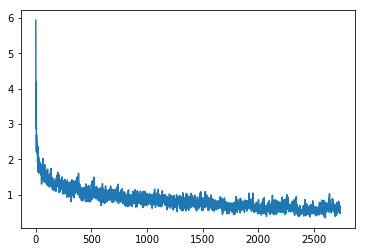

[7/30][0/391] loss = 0.448248
[7/30][1/391] loss = 0.509450
[7/30][2/391] loss = 0.476242
[7/30][3/391] loss = 0.466368
[7/30][4/391] loss = 0.520645
[7/30][5/391] loss = 0.705960
[7/30][6/391] loss = 0.507671
[7/30][7/391] loss = 0.604383
[7/30][8/391] loss = 0.549048
[7/30][9/391] loss = 0.638174
[7/30][10/391] loss = 0.623781
[7/30][11/391] loss = 0.542766
[7/30][12/391] loss = 0.529943
[7/30][13/391] loss = 0.411227
[7/30][14/391] loss = 0.481887
[7/30][15/391] loss = 0.566093
[7/30][16/391] loss = 0.658301
[7/30][17/391] loss = 0.476178
[7/30][18/391] loss = 0.529823
[7/30][19/391] loss = 0.517488
[7/30][20/391] loss = 0.453835
[7/30][21/391] loss = 0.510262
[7/30][22/391] loss = 0.629397
[7/30][23/391] loss = 0.443800
[7/30][24/391] loss = 0.506280
[7/30][25/391] loss = 0.548889
[7/30][26/391] loss = 0.547774
[7/30][27/391] loss = 0.621959
[7/30][28/391] loss = 0.421342
[7/30][29/391] loss = 0.480780
[7/30][30/391] loss = 0.474135
[7/30][31/391] loss = 0.487066
[7/30][32/391] los

[7/30][261/391] loss = 0.696681
[7/30][262/391] loss = 0.586129
[7/30][263/391] loss = 0.512378
[7/30][264/391] loss = 0.543351
[7/30][265/391] loss = 0.651012
[7/30][266/391] loss = 0.865282
[7/30][267/391] loss = 0.692228
[7/30][268/391] loss = 0.566390
[7/30][269/391] loss = 0.675394
[7/30][270/391] loss = 0.760627
[7/30][271/391] loss = 0.472696
[7/30][272/391] loss = 0.572764
[7/30][273/391] loss = 0.627942
[7/30][274/391] loss = 0.563501
[7/30][275/391] loss = 0.579626
[7/30][276/391] loss = 0.721561
[7/30][277/391] loss = 0.583105
[7/30][278/391] loss = 0.589211
[7/30][279/391] loss = 0.560696
[7/30][280/391] loss = 0.516924
[7/30][281/391] loss = 0.610478
[7/30][282/391] loss = 0.464076
[7/30][283/391] loss = 0.748679
[7/30][284/391] loss = 0.628089
[7/30][285/391] loss = 0.546469
[7/30][286/391] loss = 0.591966
[7/30][287/391] loss = 0.657952
[7/30][288/391] loss = 0.574898
[7/30][289/391] loss = 0.693615
[7/30][290/391] loss = 0.755613
[7/30][291/391] loss = 0.479711
[7/30][2

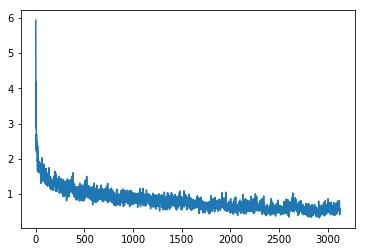

[8/30][0/391] loss = 0.457040
[8/30][1/391] loss = 0.438147
[8/30][2/391] loss = 0.510224
[8/30][3/391] loss = 0.529765
[8/30][4/391] loss = 0.502649
[8/30][5/391] loss = 0.406858
[8/30][6/391] loss = 0.453763
[8/30][7/391] loss = 0.392303
[8/30][8/391] loss = 0.374543
[8/30][9/391] loss = 0.327849
[8/30][10/391] loss = 0.561498
[8/30][11/391] loss = 0.493478
[8/30][12/391] loss = 0.371730
[8/30][13/391] loss = 0.401044
[8/30][14/391] loss = 0.459398
[8/30][15/391] loss = 0.450438
[8/30][16/391] loss = 0.533930
[8/30][17/391] loss = 0.513498
[8/30][18/391] loss = 0.461321
[8/30][19/391] loss = 0.476191
[8/30][20/391] loss = 0.481109
[8/30][21/391] loss = 0.459620
[8/30][22/391] loss = 0.446255
[8/30][23/391] loss = 0.331636
[8/30][24/391] loss = 0.336928
[8/30][25/391] loss = 0.609214
[8/30][26/391] loss = 0.332278
[8/30][27/391] loss = 0.484180
[8/30][28/391] loss = 0.596787
[8/30][29/391] loss = 0.405045
[8/30][30/391] loss = 0.437888
[8/30][31/391] loss = 0.420804
[8/30][32/391] los

[8/30][277/391] loss = 0.531441
[8/30][278/391] loss = 0.602766
[8/30][279/391] loss = 0.498202
[8/30][280/391] loss = 0.579298
[8/30][281/391] loss = 0.412011
[8/30][282/391] loss = 0.583534
[8/30][283/391] loss = 0.450576
[8/30][284/391] loss = 0.513809
[8/30][285/391] loss = 0.460877
[8/30][286/391] loss = 0.587229
[8/30][287/391] loss = 0.675695
[8/30][288/391] loss = 0.487424
[8/30][289/391] loss = 0.586235
[8/30][290/391] loss = 0.728656
[8/30][291/391] loss = 0.440211
[8/30][292/391] loss = 0.606898
[8/30][293/391] loss = 0.521900
[8/30][294/391] loss = 0.593339
[8/30][295/391] loss = 0.628892
[8/30][296/391] loss = 0.593539
[8/30][297/391] loss = 0.474154
[8/30][298/391] loss = 0.454240
[8/30][299/391] loss = 0.462226
[8/30][300/391] loss = 0.465756
[8/30][301/391] loss = 0.372800
[8/30][302/391] loss = 0.547538
[8/30][303/391] loss = 0.486216
[8/30][304/391] loss = 0.579981
[8/30][305/391] loss = 0.468917
[8/30][306/391] loss = 0.495604
[8/30][307/391] loss = 0.458513
[8/30][3

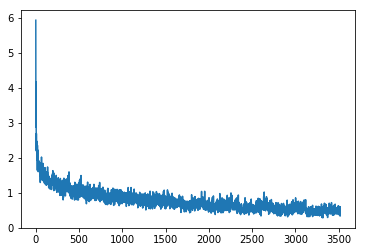

[9/30][0/391] loss = 0.499728
[9/30][1/391] loss = 0.403758
[9/30][2/391] loss = 0.410354
[9/30][3/391] loss = 0.440302
[9/30][4/391] loss = 0.481637
[9/30][5/391] loss = 0.481053
[9/30][6/391] loss = 0.403448
[9/30][7/391] loss = 0.491107
[9/30][8/391] loss = 0.363771
[9/30][9/391] loss = 0.498896
[9/30][10/391] loss = 0.386356
[9/30][11/391] loss = 0.382251
[9/30][12/391] loss = 0.487133
[9/30][13/391] loss = 0.392835
[9/30][14/391] loss = 0.447712
[9/30][15/391] loss = 0.561207
[9/30][16/391] loss = 0.425629
[9/30][17/391] loss = 0.408607
[9/30][18/391] loss = 0.365725
[9/30][19/391] loss = 0.481548
[9/30][20/391] loss = 0.421081
[9/30][21/391] loss = 0.427059
[9/30][22/391] loss = 0.450060
[9/30][23/391] loss = 0.367576
[9/30][24/391] loss = 0.415439
[9/30][25/391] loss = 0.478833
[9/30][26/391] loss = 0.378068
[9/30][27/391] loss = 0.427550
[9/30][28/391] loss = 0.365626
[9/30][29/391] loss = 0.304730
[9/30][30/391] loss = 0.404282
[9/30][31/391] loss = 0.453407
[9/30][32/391] los

[9/30][276/391] loss = 0.415070
[9/30][277/391] loss = 0.427617
[9/30][278/391] loss = 0.443033
[9/30][279/391] loss = 0.391086
[9/30][280/391] loss = 0.457494
[9/30][281/391] loss = 0.484817
[9/30][282/391] loss = 0.457545
[9/30][283/391] loss = 0.435985
[9/30][284/391] loss = 0.442886
[9/30][285/391] loss = 0.433280
[9/30][286/391] loss = 0.476034
[9/30][287/391] loss = 0.401838
[9/30][288/391] loss = 0.494235
[9/30][289/391] loss = 0.437725
[9/30][290/391] loss = 0.468854
[9/30][291/391] loss = 0.435700
[9/30][292/391] loss = 0.481539
[9/30][293/391] loss = 0.409666
[9/30][294/391] loss = 0.400512
[9/30][295/391] loss = 0.475591
[9/30][296/391] loss = 0.588963
[9/30][297/391] loss = 0.405484
[9/30][298/391] loss = 0.461668
[9/30][299/391] loss = 0.579234
[9/30][300/391] loss = 0.545749
[9/30][301/391] loss = 0.407343
[9/30][302/391] loss = 0.629504
[9/30][303/391] loss = 0.417301
[9/30][304/391] loss = 0.540136
[9/30][305/391] loss = 0.474778
[9/30][306/391] loss = 0.561845
[9/30][3

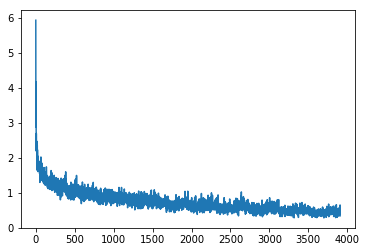

[10/30][0/391] loss = 0.315166
[10/30][1/391] loss = 0.418101
[10/30][2/391] loss = 0.293292
[10/30][3/391] loss = 0.473100
[10/30][4/391] loss = 0.508838
[10/30][5/391] loss = 0.411388
[10/30][6/391] loss = 0.305233
[10/30][7/391] loss = 0.260697
[10/30][8/391] loss = 0.346946
[10/30][9/391] loss = 0.416154
[10/30][10/391] loss = 0.485177
[10/30][11/391] loss = 0.383260
[10/30][12/391] loss = 0.397610
[10/30][13/391] loss = 0.403424
[10/30][14/391] loss = 0.422278
[10/30][15/391] loss = 0.346320
[10/30][16/391] loss = 0.373850
[10/30][17/391] loss = 0.422801
[10/30][18/391] loss = 0.391371
[10/30][19/391] loss = 0.352717
[10/30][20/391] loss = 0.308881
[10/30][21/391] loss = 0.442265
[10/30][22/391] loss = 0.364220
[10/30][23/391] loss = 0.384689
[10/30][24/391] loss = 0.412296
[10/30][25/391] loss = 0.241509
[10/30][26/391] loss = 0.353228
[10/30][27/391] loss = 0.427041
[10/30][28/391] loss = 0.513909
[10/30][29/391] loss = 0.342469
[10/30][30/391] loss = 0.244485
[10/30][31/391] lo

[10/30][252/391] loss = 0.360951
[10/30][253/391] loss = 0.540031
[10/30][254/391] loss = 0.405360
[10/30][255/391] loss = 0.512171
[10/30][256/391] loss = 0.413705
[10/30][257/391] loss = 0.699215
[10/30][258/391] loss = 0.553326
[10/30][259/391] loss = 0.323017
[10/30][260/391] loss = 0.317836
[10/30][261/391] loss = 0.473197
[10/30][262/391] loss = 0.474520
[10/30][263/391] loss = 0.543060
[10/30][264/391] loss = 0.485950
[10/30][265/391] loss = 0.463290
[10/30][266/391] loss = 0.385238
[10/30][267/391] loss = 0.424216
[10/30][268/391] loss = 0.484942
[10/30][269/391] loss = 0.406142
[10/30][270/391] loss = 0.354851
[10/30][271/391] loss = 0.383898
[10/30][272/391] loss = 0.411957
[10/30][273/391] loss = 0.464675
[10/30][274/391] loss = 0.414517
[10/30][275/391] loss = 0.509000
[10/30][276/391] loss = 0.446529
[10/30][277/391] loss = 0.516459
[10/30][278/391] loss = 0.393921
[10/30][279/391] loss = 0.546004
[10/30][280/391] loss = 0.383199
[10/30][281/391] loss = 0.391086
[10/30][28

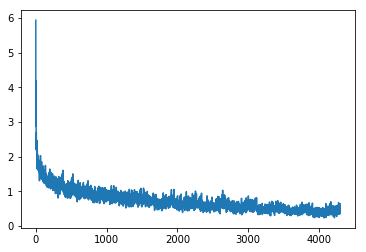

[11/30][0/391] loss = 0.411889
[11/30][1/391] loss = 0.404579
[11/30][2/391] loss = 0.367944
[11/30][3/391] loss = 0.311141
[11/30][4/391] loss = 0.374533
[11/30][5/391] loss = 0.371902
[11/30][6/391] loss = 0.378209
[11/30][7/391] loss = 0.372487
[11/30][8/391] loss = 0.310748
[11/30][9/391] loss = 0.294763
[11/30][10/391] loss = 0.322049
[11/30][11/391] loss = 0.323418
[11/30][12/391] loss = 0.468731
[11/30][13/391] loss = 0.367824
[11/30][14/391] loss = 0.367684
[11/30][15/391] loss = 0.295108
[11/30][16/391] loss = 0.347605
[11/30][17/391] loss = 0.295639
[11/30][18/391] loss = 0.373055
[11/30][19/391] loss = 0.463636
[11/30][20/391] loss = 0.351738
[11/30][21/391] loss = 0.274098
[11/30][22/391] loss = 0.329228
[11/30][23/391] loss = 0.363620
[11/30][24/391] loss = 0.395649
[11/30][25/391] loss = 0.348987
[11/30][26/391] loss = 0.367909
[11/30][27/391] loss = 0.328540
[11/30][28/391] loss = 0.355455
[11/30][29/391] loss = 0.370797
[11/30][30/391] loss = 0.434140
[11/30][31/391] lo

[11/30][261/391] loss = 0.312335
[11/30][262/391] loss = 0.337649
[11/30][263/391] loss = 0.460084
[11/30][264/391] loss = 0.413048
[11/30][265/391] loss = 0.512390
[11/30][266/391] loss = 0.370210
[11/30][267/391] loss = 0.268187
[11/30][268/391] loss = 0.348092
[11/30][269/391] loss = 0.288204
[11/30][270/391] loss = 0.514187
[11/30][271/391] loss = 0.343552
[11/30][272/391] loss = 0.335297
[11/30][273/391] loss = 0.486434
[11/30][274/391] loss = 0.397073
[11/30][275/391] loss = 0.435577
[11/30][276/391] loss = 0.403866
[11/30][277/391] loss = 0.453979
[11/30][278/391] loss = 0.357164
[11/30][279/391] loss = 0.331705
[11/30][280/391] loss = 0.439114
[11/30][281/391] loss = 0.284917
[11/30][282/391] loss = 0.409522
[11/30][283/391] loss = 0.368765
[11/30][284/391] loss = 0.467552
[11/30][285/391] loss = 0.320334
[11/30][286/391] loss = 0.350343
[11/30][287/391] loss = 0.336788
[11/30][288/391] loss = 0.412473
[11/30][289/391] loss = 0.320520
[11/30][290/391] loss = 0.491270
[11/30][29

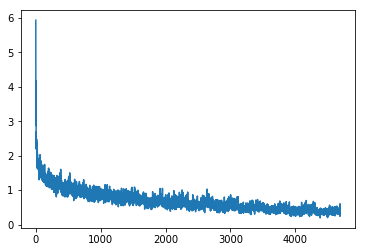

[12/30][0/391] loss = 0.312634
[12/30][1/391] loss = 0.289427
[12/30][2/391] loss = 0.300552
[12/30][3/391] loss = 0.305771
[12/30][4/391] loss = 0.213041
[12/30][5/391] loss = 0.234258
[12/30][6/391] loss = 0.314024
[12/30][7/391] loss = 0.228936
[12/30][8/391] loss = 0.277472
[12/30][9/391] loss = 0.237740
[12/30][10/391] loss = 0.333637
[12/30][11/391] loss = 0.318736
[12/30][12/391] loss = 0.346962
[12/30][13/391] loss = 0.344555
[12/30][14/391] loss = 0.249747
[12/30][15/391] loss = 0.284762
[12/30][16/391] loss = 0.282199
[12/30][17/391] loss = 0.478164
[12/30][18/391] loss = 0.235259
[12/30][19/391] loss = 0.335490
[12/30][20/391] loss = 0.413541
[12/30][21/391] loss = 0.364214
[12/30][22/391] loss = 0.326896
[12/30][23/391] loss = 0.260295
[12/30][24/391] loss = 0.311829
[12/30][25/391] loss = 0.334645
[12/30][26/391] loss = 0.235129
[12/30][27/391] loss = 0.184976
[12/30][28/391] loss = 0.290245
[12/30][29/391] loss = 0.249466
[12/30][30/391] loss = 0.376845
[12/30][31/391] lo

[12/30][260/391] loss = 0.320666
[12/30][261/391] loss = 0.348558
[12/30][262/391] loss = 0.413167
[12/30][263/391] loss = 0.281252
[12/30][264/391] loss = 0.308079
[12/30][265/391] loss = 0.343689
[12/30][266/391] loss = 0.299948
[12/30][267/391] loss = 0.274211
[12/30][268/391] loss = 0.321091
[12/30][269/391] loss = 0.469859
[12/30][270/391] loss = 0.300583
[12/30][271/391] loss = 0.339359
[12/30][272/391] loss = 0.304428
[12/30][273/391] loss = 0.274498
[12/30][274/391] loss = 0.268939
[12/30][275/391] loss = 0.229728
[12/30][276/391] loss = 0.245835
[12/30][277/391] loss = 0.333668
[12/30][278/391] loss = 0.443043
[12/30][279/391] loss = 0.239781
[12/30][280/391] loss = 0.502594
[12/30][281/391] loss = 0.273596
[12/30][282/391] loss = 0.313775
[12/30][283/391] loss = 0.324259
[12/30][284/391] loss = 0.321190
[12/30][285/391] loss = 0.286033
[12/30][286/391] loss = 0.374400
[12/30][287/391] loss = 0.251879
[12/30][288/391] loss = 0.314248
[12/30][289/391] loss = 0.397607
[12/30][29

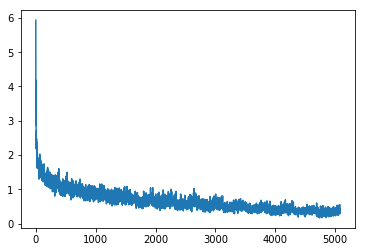

[13/30][0/391] loss = 0.213804
[13/30][1/391] loss = 0.317840
[13/30][2/391] loss = 0.184358
[13/30][3/391] loss = 0.350633
[13/30][4/391] loss = 0.342624
[13/30][5/391] loss = 0.299085
[13/30][6/391] loss = 0.223034
[13/30][7/391] loss = 0.223281
[13/30][8/391] loss = 0.221137
[13/30][9/391] loss = 0.288736
[13/30][10/391] loss = 0.343227
[13/30][11/391] loss = 0.230358
[13/30][12/391] loss = 0.357738
[13/30][13/391] loss = 0.243321
[13/30][14/391] loss = 0.306020
[13/30][15/391] loss = 0.321447
[13/30][16/391] loss = 0.286003
[13/30][17/391] loss = 0.289453
[13/30][18/391] loss = 0.298949
[13/30][19/391] loss = 0.218506
[13/30][20/391] loss = 0.208823
[13/30][21/391] loss = 0.280587
[13/30][22/391] loss = 0.283480
[13/30][23/391] loss = 0.260990
[13/30][24/391] loss = 0.243416
[13/30][25/391] loss = 0.281078
[13/30][26/391] loss = 0.259348
[13/30][27/391] loss = 0.263430
[13/30][28/391] loss = 0.360519
[13/30][29/391] loss = 0.260966
[13/30][30/391] loss = 0.252309
[13/30][31/391] lo

[13/30][260/391] loss = 0.450937
[13/30][261/391] loss = 0.263831
[13/30][262/391] loss = 0.360576
[13/30][263/391] loss = 0.307842
[13/30][264/391] loss = 0.370313
[13/30][265/391] loss = 0.372061
[13/30][266/391] loss = 0.335583
[13/30][267/391] loss = 0.377448
[13/30][268/391] loss = 0.314162
[13/30][269/391] loss = 0.390372
[13/30][270/391] loss = 0.380092
[13/30][271/391] loss = 0.423905
[13/30][272/391] loss = 0.393756
[13/30][273/391] loss = 0.274522
[13/30][274/391] loss = 0.361601
[13/30][275/391] loss = 0.418017
[13/30][276/391] loss = 0.288036
[13/30][277/391] loss = 0.347664
[13/30][278/391] loss = 0.322363
[13/30][279/391] loss = 0.295393
[13/30][280/391] loss = 0.312279
[13/30][281/391] loss = 0.236658
[13/30][282/391] loss = 0.393438
[13/30][283/391] loss = 0.386593
[13/30][284/391] loss = 0.307243
[13/30][285/391] loss = 0.303230
[13/30][286/391] loss = 0.384897
[13/30][287/391] loss = 0.297531
[13/30][288/391] loss = 0.328416
[13/30][289/391] loss = 0.287415
[13/30][29

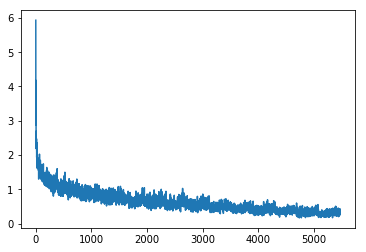

[14/30][0/391] loss = 0.255411
[14/30][1/391] loss = 0.132330
[14/30][2/391] loss = 0.197420
[14/30][3/391] loss = 0.251246
[14/30][4/391] loss = 0.315117
[14/30][5/391] loss = 0.330735
[14/30][6/391] loss = 0.288254
[14/30][7/391] loss = 0.299898
[14/30][8/391] loss = 0.327713
[14/30][9/391] loss = 0.206646
[14/30][10/391] loss = 0.239202
[14/30][11/391] loss = 0.270073
[14/30][12/391] loss = 0.215512
[14/30][13/391] loss = 0.157286
[14/30][14/391] loss = 0.276458
[14/30][15/391] loss = 0.203184
[14/30][16/391] loss = 0.254780
[14/30][17/391] loss = 0.260789
[14/30][18/391] loss = 0.257092
[14/30][19/391] loss = 0.226315
[14/30][20/391] loss = 0.289338
[14/30][21/391] loss = 0.242414
[14/30][22/391] loss = 0.253268
[14/30][23/391] loss = 0.285605
[14/30][24/391] loss = 0.331778
[14/30][25/391] loss = 0.223088
[14/30][26/391] loss = 0.243986
[14/30][27/391] loss = 0.304006
[14/30][28/391] loss = 0.193002
[14/30][29/391] loss = 0.256946
[14/30][30/391] loss = 0.324974
[14/30][31/391] lo

[14/30][268/391] loss = 0.427014
[14/30][269/391] loss = 0.226459
[14/30][270/391] loss = 0.366059
[14/30][271/391] loss = 0.397397
[14/30][272/391] loss = 0.387992
[14/30][273/391] loss = 0.246992
[14/30][274/391] loss = 0.277983
[14/30][275/391] loss = 0.244461
[14/30][276/391] loss = 0.200573
[14/30][277/391] loss = 0.237835
[14/30][278/391] loss = 0.283578
[14/30][279/391] loss = 0.397964
[14/30][280/391] loss = 0.208480
[14/30][281/391] loss = 0.238174
[14/30][282/391] loss = 0.339227
[14/30][283/391] loss = 0.264026
[14/30][284/391] loss = 0.192476
[14/30][285/391] loss = 0.257682
[14/30][286/391] loss = 0.298054
[14/30][287/391] loss = 0.246958
[14/30][288/391] loss = 0.378256
[14/30][289/391] loss = 0.287061
[14/30][290/391] loss = 0.256794
[14/30][291/391] loss = 0.244675
[14/30][292/391] loss = 0.217757
[14/30][293/391] loss = 0.280502
[14/30][294/391] loss = 0.351952
[14/30][295/391] loss = 0.152807
[14/30][296/391] loss = 0.216196
[14/30][297/391] loss = 0.327698
[14/30][29

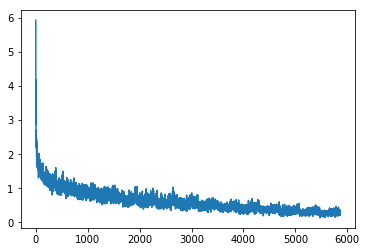

[15/30][0/391] loss = 0.165245
[15/30][1/391] loss = 0.215932
[15/30][2/391] loss = 0.172012
[15/30][3/391] loss = 0.277493
[15/30][4/391] loss = 0.269455
[15/30][5/391] loss = 0.270707
[15/30][6/391] loss = 0.144270
[15/30][7/391] loss = 0.195954
[15/30][8/391] loss = 0.163800
[15/30][9/391] loss = 0.125986
[15/30][10/391] loss = 0.283752
[15/30][11/391] loss = 0.200689
[15/30][12/391] loss = 0.175344
[15/30][13/391] loss = 0.214304
[15/30][14/391] loss = 0.264600
[15/30][15/391] loss = 0.212117
[15/30][16/391] loss = 0.203510
[15/30][17/391] loss = 0.335768
[15/30][18/391] loss = 0.215292
[15/30][19/391] loss = 0.236929
[15/30][20/391] loss = 0.231071
[15/30][21/391] loss = 0.246304
[15/30][22/391] loss = 0.186240
[15/30][23/391] loss = 0.231453
[15/30][24/391] loss = 0.184724
[15/30][25/391] loss = 0.210361
[15/30][26/391] loss = 0.334271
[15/30][27/391] loss = 0.154327
[15/30][28/391] loss = 0.191740
[15/30][29/391] loss = 0.228115
[15/30][30/391] loss = 0.215492
[15/30][31/391] lo

[15/30][260/391] loss = 0.249177
[15/30][261/391] loss = 0.183502
[15/30][262/391] loss = 0.340718
[15/30][263/391] loss = 0.294305
[15/30][264/391] loss = 0.241572
[15/30][265/391] loss = 0.327589
[15/30][266/391] loss = 0.225235
[15/30][267/391] loss = 0.257370
[15/30][268/391] loss = 0.224938
[15/30][269/391] loss = 0.347120
[15/30][270/391] loss = 0.306860
[15/30][271/391] loss = 0.293496
[15/30][272/391] loss = 0.238644
[15/30][273/391] loss = 0.242481
[15/30][274/391] loss = 0.356859
[15/30][275/391] loss = 0.265234
[15/30][276/391] loss = 0.306735
[15/30][277/391] loss = 0.304565
[15/30][278/391] loss = 0.326716
[15/30][279/391] loss = 0.225898
[15/30][280/391] loss = 0.395971
[15/30][281/391] loss = 0.253782
[15/30][282/391] loss = 0.333049
[15/30][283/391] loss = 0.323382
[15/30][284/391] loss = 0.360609
[15/30][285/391] loss = 0.311663
[15/30][286/391] loss = 0.440860
[15/30][287/391] loss = 0.304248
[15/30][288/391] loss = 0.256792
[15/30][289/391] loss = 0.364703
[15/30][29

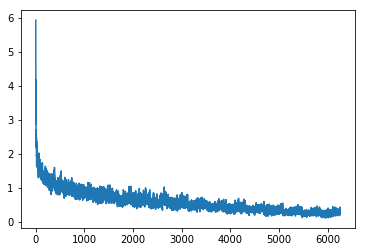

[16/30][0/391] loss = 0.171840
[16/30][1/391] loss = 0.173806
[16/30][2/391] loss = 0.240820
[16/30][3/391] loss = 0.275975
[16/30][4/391] loss = 0.193647
[16/30][5/391] loss = 0.111993
[16/30][6/391] loss = 0.142210
[16/30][7/391] loss = 0.165009
[16/30][8/391] loss = 0.199724
[16/30][9/391] loss = 0.164311
[16/30][10/391] loss = 0.135463
[16/30][11/391] loss = 0.208715
[16/30][12/391] loss = 0.181818
[16/30][13/391] loss = 0.112303
[16/30][14/391] loss = 0.223980
[16/30][15/391] loss = 0.226599
[16/30][16/391] loss = 0.210455
[16/30][17/391] loss = 0.270793
[16/30][18/391] loss = 0.226541
[16/30][19/391] loss = 0.235683
[16/30][20/391] loss = 0.145750
[16/30][21/391] loss = 0.214242
[16/30][22/391] loss = 0.188908
[16/30][23/391] loss = 0.158700
[16/30][24/391] loss = 0.225556
[16/30][25/391] loss = 0.292396
[16/30][26/391] loss = 0.197582
[16/30][27/391] loss = 0.168059
[16/30][28/391] loss = 0.185514
[16/30][29/391] loss = 0.150877
[16/30][30/391] loss = 0.285188
[16/30][31/391] lo

[16/30][270/391] loss = 0.179820
[16/30][271/391] loss = 0.235895
[16/30][272/391] loss = 0.238408
[16/30][273/391] loss = 0.156878
[16/30][274/391] loss = 0.181988
[16/30][275/391] loss = 0.212058
[16/30][276/391] loss = 0.159077
[16/30][277/391] loss = 0.198170
[16/30][278/391] loss = 0.157099
[16/30][279/391] loss = 0.176337
[16/30][280/391] loss = 0.297917
[16/30][281/391] loss = 0.258314
[16/30][282/391] loss = 0.219027
[16/30][283/391] loss = 0.159752
[16/30][284/391] loss = 0.156306
[16/30][285/391] loss = 0.273932
[16/30][286/391] loss = 0.202317
[16/30][287/391] loss = 0.288458
[16/30][288/391] loss = 0.210776
[16/30][289/391] loss = 0.265603
[16/30][290/391] loss = 0.250373
[16/30][291/391] loss = 0.215985
[16/30][292/391] loss = 0.294013
[16/30][293/391] loss = 0.263209
[16/30][294/391] loss = 0.263615
[16/30][295/391] loss = 0.266390
[16/30][296/391] loss = 0.135852
[16/30][297/391] loss = 0.237855
[16/30][298/391] loss = 0.216475
[16/30][299/391] loss = 0.251940
[16/30][30

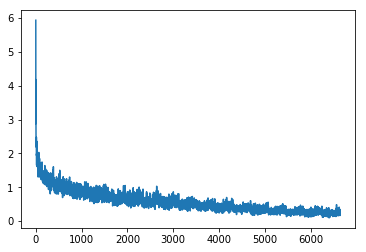

[17/30][0/391] loss = 0.262173
[17/30][1/391] loss = 0.240183
[17/30][2/391] loss = 0.182315
[17/30][3/391] loss = 0.395035
[17/30][4/391] loss = 0.246466
[17/30][5/391] loss = 0.171143
[17/30][6/391] loss = 0.194995
[17/30][7/391] loss = 0.171154
[17/30][8/391] loss = 0.265861
[17/30][9/391] loss = 0.225704
[17/30][10/391] loss = 0.172403
[17/30][11/391] loss = 0.221570
[17/30][12/391] loss = 0.207413
[17/30][13/391] loss = 0.143999
[17/30][14/391] loss = 0.171547
[17/30][15/391] loss = 0.214971
[17/30][16/391] loss = 0.138195
[17/30][17/391] loss = 0.163819
[17/30][18/391] loss = 0.177171
[17/30][19/391] loss = 0.096955
[17/30][20/391] loss = 0.260891
[17/30][21/391] loss = 0.146183
[17/30][22/391] loss = 0.162160
[17/30][23/391] loss = 0.138888
[17/30][24/391] loss = 0.237755
[17/30][25/391] loss = 0.173352
[17/30][26/391] loss = 0.182908
[17/30][27/391] loss = 0.191481
[17/30][28/391] loss = 0.231560
[17/30][29/391] loss = 0.156158
[17/30][30/391] loss = 0.158195
[17/30][31/391] lo

[17/30][256/391] loss = 0.247987
[17/30][257/391] loss = 0.294290
[17/30][258/391] loss = 0.185005
[17/30][259/391] loss = 0.179385
[17/30][260/391] loss = 0.239648
[17/30][261/391] loss = 0.166145
[17/30][262/391] loss = 0.217905
[17/30][263/391] loss = 0.279651
[17/30][264/391] loss = 0.179828
[17/30][265/391] loss = 0.159347
[17/30][266/391] loss = 0.219795
[17/30][267/391] loss = 0.175358
[17/30][268/391] loss = 0.215609
[17/30][269/391] loss = 0.187730
[17/30][270/391] loss = 0.258781
[17/30][271/391] loss = 0.184687
[17/30][272/391] loss = 0.148192
[17/30][273/391] loss = 0.211079
[17/30][274/391] loss = 0.222883
[17/30][275/391] loss = 0.289854
[17/30][276/391] loss = 0.251452
[17/30][277/391] loss = 0.332941
[17/30][278/391] loss = 0.195312
[17/30][279/391] loss = 0.197132
[17/30][280/391] loss = 0.187543
[17/30][281/391] loss = 0.277943
[17/30][282/391] loss = 0.285413
[17/30][283/391] loss = 0.273367
[17/30][284/391] loss = 0.140416
[17/30][285/391] loss = 0.161191
[17/30][28

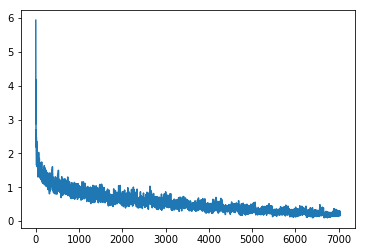

[18/30][0/391] loss = 0.185486
[18/30][1/391] loss = 0.180445
[18/30][2/391] loss = 0.162918
[18/30][3/391] loss = 0.172981
[18/30][4/391] loss = 0.215069
[18/30][5/391] loss = 0.123752
[18/30][6/391] loss = 0.167969
[18/30][7/391] loss = 0.124215
[18/30][8/391] loss = 0.211053
[18/30][9/391] loss = 0.103515
[18/30][10/391] loss = 0.161743
[18/30][11/391] loss = 0.151433
[18/30][12/391] loss = 0.181324
[18/30][13/391] loss = 0.149990
[18/30][14/391] loss = 0.181726
[18/30][15/391] loss = 0.131994
[18/30][16/391] loss = 0.182639
[18/30][17/391] loss = 0.198381
[18/30][18/391] loss = 0.140147
[18/30][19/391] loss = 0.150574
[18/30][20/391] loss = 0.076892
[18/30][21/391] loss = 0.236411
[18/30][22/391] loss = 0.191328
[18/30][23/391] loss = 0.188051
[18/30][24/391] loss = 0.114284
[18/30][25/391] loss = 0.156522
[18/30][26/391] loss = 0.126914
[18/30][27/391] loss = 0.190607
[18/30][28/391] loss = 0.176802
[18/30][29/391] loss = 0.156020
[18/30][30/391] loss = 0.154893
[18/30][31/391] lo

[18/30][258/391] loss = 0.211720
[18/30][259/391] loss = 0.298244
[18/30][260/391] loss = 0.192491
[18/30][261/391] loss = 0.198721
[18/30][262/391] loss = 0.170332
[18/30][263/391] loss = 0.159783
[18/30][264/391] loss = 0.181773
[18/30][265/391] loss = 0.212948
[18/30][266/391] loss = 0.184020
[18/30][267/391] loss = 0.215072
[18/30][268/391] loss = 0.169750
[18/30][269/391] loss = 0.184420
[18/30][270/391] loss = 0.317100
[18/30][271/391] loss = 0.153414
[18/30][272/391] loss = 0.278937
[18/30][273/391] loss = 0.242332
[18/30][274/391] loss = 0.186753
[18/30][275/391] loss = 0.147888
[18/30][276/391] loss = 0.250348
[18/30][277/391] loss = 0.215105
[18/30][278/391] loss = 0.260457
[18/30][279/391] loss = 0.194760
[18/30][280/391] loss = 0.192348
[18/30][281/391] loss = 0.190810
[18/30][282/391] loss = 0.266329
[18/30][283/391] loss = 0.137650
[18/30][284/391] loss = 0.189537
[18/30][285/391] loss = 0.179360
[18/30][286/391] loss = 0.205477
[18/30][287/391] loss = 0.189605
[18/30][28

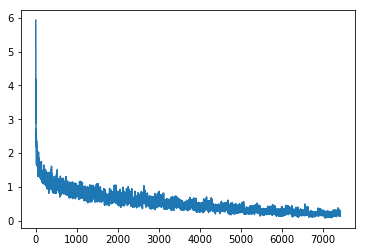

[19/30][0/391] loss = 0.137027
[19/30][1/391] loss = 0.115000
[19/30][2/391] loss = 0.158431
[19/30][3/391] loss = 0.109940
[19/30][4/391] loss = 0.160301
[19/30][5/391] loss = 0.097853
[19/30][6/391] loss = 0.104065
[19/30][7/391] loss = 0.135878
[19/30][8/391] loss = 0.094544
[19/30][9/391] loss = 0.127284
[19/30][10/391] loss = 0.163046
[19/30][11/391] loss = 0.122522
[19/30][12/391] loss = 0.162426
[19/30][13/391] loss = 0.140035
[19/30][14/391] loss = 0.224594
[19/30][15/391] loss = 0.105185
[19/30][16/391] loss = 0.149372
[19/30][17/391] loss = 0.129423
[19/30][18/391] loss = 0.152646
[19/30][19/391] loss = 0.116225
[19/30][20/391] loss = 0.156896
[19/30][21/391] loss = 0.090172
[19/30][22/391] loss = 0.122888
[19/30][23/391] loss = 0.107603
[19/30][24/391] loss = 0.102061
[19/30][25/391] loss = 0.143121
[19/30][26/391] loss = 0.145625
[19/30][27/391] loss = 0.157807
[19/30][28/391] loss = 0.118954
[19/30][29/391] loss = 0.135812
[19/30][30/391] loss = 0.139486
[19/30][31/391] lo

[19/30][260/391] loss = 0.102298
[19/30][261/391] loss = 0.148224
[19/30][262/391] loss = 0.167126
[19/30][263/391] loss = 0.134066
[19/30][264/391] loss = 0.116629
[19/30][265/391] loss = 0.142827
[19/30][266/391] loss = 0.190293
[19/30][267/391] loss = 0.246921
[19/30][268/391] loss = 0.114574
[19/30][269/391] loss = 0.233908
[19/30][270/391] loss = 0.134213
[19/30][271/391] loss = 0.162322
[19/30][272/391] loss = 0.152320
[19/30][273/391] loss = 0.152516
[19/30][274/391] loss = 0.181501
[19/30][275/391] loss = 0.255147
[19/30][276/391] loss = 0.142718
[19/30][277/391] loss = 0.117667
[19/30][278/391] loss = 0.156803
[19/30][279/391] loss = 0.142276
[19/30][280/391] loss = 0.176239
[19/30][281/391] loss = 0.167254
[19/30][282/391] loss = 0.213484
[19/30][283/391] loss = 0.091054
[19/30][284/391] loss = 0.175827
[19/30][285/391] loss = 0.249244
[19/30][286/391] loss = 0.169775
[19/30][287/391] loss = 0.118338
[19/30][288/391] loss = 0.176847
[19/30][289/391] loss = 0.159705
[19/30][29

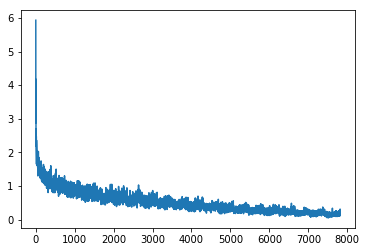

[20/30][0/391] loss = 0.120817
[20/30][1/391] loss = 0.110909
[20/30][2/391] loss = 0.115853
[20/30][3/391] loss = 0.106552
[20/30][4/391] loss = 0.160095
[20/30][5/391] loss = 0.159457
[20/30][6/391] loss = 0.130460
[20/30][7/391] loss = 0.171692
[20/30][8/391] loss = 0.129443
[20/30][9/391] loss = 0.170281
[20/30][10/391] loss = 0.129092
[20/30][11/391] loss = 0.151192
[20/30][12/391] loss = 0.105854
[20/30][13/391] loss = 0.135724
[20/30][14/391] loss = 0.140100
[20/30][15/391] loss = 0.139404
[20/30][16/391] loss = 0.125693
[20/30][17/391] loss = 0.104798
[20/30][18/391] loss = 0.165316
[20/30][19/391] loss = 0.145020
[20/30][20/391] loss = 0.117863
[20/30][21/391] loss = 0.114912
[20/30][22/391] loss = 0.159114
[20/30][23/391] loss = 0.126874
[20/30][24/391] loss = 0.180762
[20/30][25/391] loss = 0.128499
[20/30][26/391] loss = 0.143724
[20/30][27/391] loss = 0.101581
[20/30][28/391] loss = 0.102554
[20/30][29/391] loss = 0.142814
[20/30][30/391] loss = 0.115351
[20/30][31/391] lo

[20/30][261/391] loss = 0.165259
[20/30][262/391] loss = 0.163490
[20/30][263/391] loss = 0.202690
[20/30][264/391] loss = 0.185058
[20/30][265/391] loss = 0.116153
[20/30][266/391] loss = 0.166693
[20/30][267/391] loss = 0.121260
[20/30][268/391] loss = 0.148276
[20/30][269/391] loss = 0.208807
[20/30][270/391] loss = 0.130723
[20/30][271/391] loss = 0.263104
[20/30][272/391] loss = 0.160189
[20/30][273/391] loss = 0.226395
[20/30][274/391] loss = 0.159931
[20/30][275/391] loss = 0.139539
[20/30][276/391] loss = 0.199159
[20/30][277/391] loss = 0.137127
[20/30][278/391] loss = 0.150289
[20/30][279/391] loss = 0.240391
[20/30][280/391] loss = 0.136862
[20/30][281/391] loss = 0.123938
[20/30][282/391] loss = 0.141558
[20/30][283/391] loss = 0.145828
[20/30][284/391] loss = 0.155302
[20/30][285/391] loss = 0.119382
[20/30][286/391] loss = 0.223860
[20/30][287/391] loss = 0.137674
[20/30][288/391] loss = 0.090898
[20/30][289/391] loss = 0.124206
[20/30][290/391] loss = 0.157610
[20/30][29

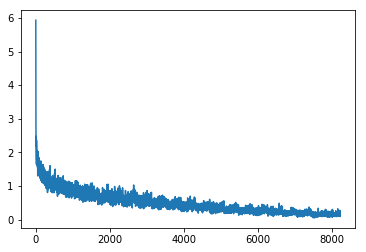

[21/30][0/391] loss = 0.090069
[21/30][1/391] loss = 0.126243
[21/30][2/391] loss = 0.146371
[21/30][3/391] loss = 0.103684
[21/30][4/391] loss = 0.091281
[21/30][5/391] loss = 0.065299
[21/30][6/391] loss = 0.125964
[21/30][7/391] loss = 0.076349
[21/30][8/391] loss = 0.107143
[21/30][9/391] loss = 0.175614
[21/30][10/391] loss = 0.115774
[21/30][11/391] loss = 0.098148
[21/30][12/391] loss = 0.099819
[21/30][13/391] loss = 0.099968
[21/30][14/391] loss = 0.095640
[21/30][15/391] loss = 0.131176
[21/30][16/391] loss = 0.072928
[21/30][17/391] loss = 0.072907
[21/30][18/391] loss = 0.127762
[21/30][19/391] loss = 0.095166
[21/30][20/391] loss = 0.132005
[21/30][21/391] loss = 0.079369
[21/30][22/391] loss = 0.147021
[21/30][23/391] loss = 0.137144
[21/30][24/391] loss = 0.116762
[21/30][25/391] loss = 0.068858
[21/30][26/391] loss = 0.112913
[21/30][27/391] loss = 0.080367
[21/30][28/391] loss = 0.151867
[21/30][29/391] loss = 0.100134
[21/30][30/391] loss = 0.105742
[21/30][31/391] lo

[21/30][268/391] loss = 0.139900
[21/30][269/391] loss = 0.124511
[21/30][270/391] loss = 0.097516
[21/30][271/391] loss = 0.176301
[21/30][272/391] loss = 0.172082
[21/30][273/391] loss = 0.128261
[21/30][274/391] loss = 0.111277
[21/30][275/391] loss = 0.149547
[21/30][276/391] loss = 0.172767
[21/30][277/391] loss = 0.120100
[21/30][278/391] loss = 0.163237
[21/30][279/391] loss = 0.116290
[21/30][280/391] loss = 0.167754
[21/30][281/391] loss = 0.134836
[21/30][282/391] loss = 0.205508
[21/30][283/391] loss = 0.116312
[21/30][284/391] loss = 0.141539
[21/30][285/391] loss = 0.119262
[21/30][286/391] loss = 0.185245
[21/30][287/391] loss = 0.130610
[21/30][288/391] loss = 0.198241
[21/30][289/391] loss = 0.129390
[21/30][290/391] loss = 0.086160
[21/30][291/391] loss = 0.115798
[21/30][292/391] loss = 0.113883
[21/30][293/391] loss = 0.084784
[21/30][294/391] loss = 0.149058
[21/30][295/391] loss = 0.141039
[21/30][296/391] loss = 0.121692
[21/30][297/391] loss = 0.123883
[21/30][29

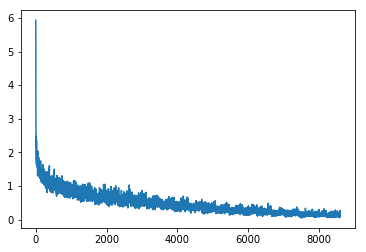

[22/30][0/391] loss = 0.092566
[22/30][1/391] loss = 0.153061
[22/30][2/391] loss = 0.104461
[22/30][3/391] loss = 0.190583
[22/30][4/391] loss = 0.126512
[22/30][5/391] loss = 0.148196
[22/30][6/391] loss = 0.083824
[22/30][7/391] loss = 0.094470
[22/30][8/391] loss = 0.100366
[22/30][9/391] loss = 0.109314
[22/30][10/391] loss = 0.138504
[22/30][11/391] loss = 0.104663
[22/30][12/391] loss = 0.134411
[22/30][13/391] loss = 0.071000
[22/30][14/391] loss = 0.105089
[22/30][15/391] loss = 0.099727
[22/30][16/391] loss = 0.171459
[22/30][17/391] loss = 0.089308
[22/30][18/391] loss = 0.194173
[22/30][19/391] loss = 0.134765
[22/30][20/391] loss = 0.107475
[22/30][21/391] loss = 0.165870
[22/30][22/391] loss = 0.132637
[22/30][23/391] loss = 0.144283
[22/30][24/391] loss = 0.118278
[22/30][25/391] loss = 0.149176
[22/30][26/391] loss = 0.098016
[22/30][27/391] loss = 0.171363
[22/30][28/391] loss = 0.143888
[22/30][29/391] loss = 0.121399
[22/30][30/391] loss = 0.118556
[22/30][31/391] lo

[22/30][258/391] loss = 0.152761
[22/30][259/391] loss = 0.080667
[22/30][260/391] loss = 0.171250
[22/30][261/391] loss = 0.091945
[22/30][262/391] loss = 0.131369
[22/30][263/391] loss = 0.114817
[22/30][264/391] loss = 0.140346
[22/30][265/391] loss = 0.232905
[22/30][266/391] loss = 0.167807
[22/30][267/391] loss = 0.149805
[22/30][268/391] loss = 0.182445
[22/30][269/391] loss = 0.122185
[22/30][270/391] loss = 0.147922
[22/30][271/391] loss = 0.138956
[22/30][272/391] loss = 0.177403
[22/30][273/391] loss = 0.130671
[22/30][274/391] loss = 0.157647
[22/30][275/391] loss = 0.150848
[22/30][276/391] loss = 0.069507
[22/30][277/391] loss = 0.131506
[22/30][278/391] loss = 0.364611
[22/30][279/391] loss = 0.129983
[22/30][280/391] loss = 0.090152
[22/30][281/391] loss = 0.300718
[22/30][282/391] loss = 0.176110
[22/30][283/391] loss = 0.158345
[22/30][284/391] loss = 0.171818
[22/30][285/391] loss = 0.167163
[22/30][286/391] loss = 0.128987
[22/30][287/391] loss = 0.145303
[22/30][28

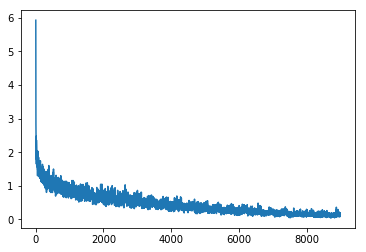

[23/30][0/391] loss = 0.110456
[23/30][1/391] loss = 0.091534
[23/30][2/391] loss = 0.081618
[23/30][3/391] loss = 0.128350
[23/30][4/391] loss = 0.107410
[23/30][5/391] loss = 0.152434
[23/30][6/391] loss = 0.128370
[23/30][7/391] loss = 0.120762
[23/30][8/391] loss = 0.090405
[23/30][9/391] loss = 0.064994
[23/30][10/391] loss = 0.072660
[23/30][11/391] loss = 0.097249
[23/30][12/391] loss = 0.118128
[23/30][13/391] loss = 0.085315
[23/30][14/391] loss = 0.056567
[23/30][15/391] loss = 0.056191
[23/30][16/391] loss = 0.119503
[23/30][17/391] loss = 0.064896
[23/30][18/391] loss = 0.077846
[23/30][19/391] loss = 0.089508
[23/30][20/391] loss = 0.078513
[23/30][21/391] loss = 0.070118
[23/30][22/391] loss = 0.066974
[23/30][23/391] loss = 0.080956
[23/30][24/391] loss = 0.074995
[23/30][25/391] loss = 0.095321
[23/30][26/391] loss = 0.113286
[23/30][27/391] loss = 0.094381
[23/30][28/391] loss = 0.171106
[23/30][29/391] loss = 0.065657
[23/30][30/391] loss = 0.073443
[23/30][31/391] lo

[23/30][265/391] loss = 0.128700
[23/30][266/391] loss = 0.126318
[23/30][267/391] loss = 0.111833
[23/30][268/391] loss = 0.174919
[23/30][269/391] loss = 0.102971
[23/30][270/391] loss = 0.096333
[23/30][271/391] loss = 0.107108
[23/30][272/391] loss = 0.105168
[23/30][273/391] loss = 0.191214
[23/30][274/391] loss = 0.138464
[23/30][275/391] loss = 0.143338
[23/30][276/391] loss = 0.106959
[23/30][277/391] loss = 0.049940
[23/30][278/391] loss = 0.139430
[23/30][279/391] loss = 0.129158
[23/30][280/391] loss = 0.121716
[23/30][281/391] loss = 0.099669
[23/30][282/391] loss = 0.114434
[23/30][283/391] loss = 0.156940
[23/30][284/391] loss = 0.136341
[23/30][285/391] loss = 0.140557
[23/30][286/391] loss = 0.246201
[23/30][287/391] loss = 0.116801
[23/30][288/391] loss = 0.154417
[23/30][289/391] loss = 0.175293
[23/30][290/391] loss = 0.124194
[23/30][291/391] loss = 0.084158
[23/30][292/391] loss = 0.135912
[23/30][293/391] loss = 0.125474
[23/30][294/391] loss = 0.132294
[23/30][29

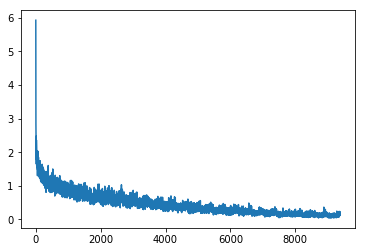

[24/30][0/391] loss = 0.146544
[24/30][1/391] loss = 0.106842
[24/30][2/391] loss = 0.128014
[24/30][3/391] loss = 0.079439
[24/30][4/391] loss = 0.096221
[24/30][5/391] loss = 0.120600
[24/30][6/391] loss = 0.057765
[24/30][7/391] loss = 0.186210
[24/30][8/391] loss = 0.106094
[24/30][9/391] loss = 0.082754
[24/30][10/391] loss = 0.129180
[24/30][11/391] loss = 0.099796
[24/30][12/391] loss = 0.118148
[24/30][13/391] loss = 0.108530
[24/30][14/391] loss = 0.070737
[24/30][15/391] loss = 0.099139
[24/30][16/391] loss = 0.079005
[24/30][17/391] loss = 0.109395
[24/30][18/391] loss = 0.138994
[24/30][19/391] loss = 0.095045
[24/30][20/391] loss = 0.063306
[24/30][21/391] loss = 0.083882
[24/30][22/391] loss = 0.117212
[24/30][23/391] loss = 0.088536
[24/30][24/391] loss = 0.048233
[24/30][25/391] loss = 0.142456
[24/30][26/391] loss = 0.049458
[24/30][27/391] loss = 0.064103
[24/30][28/391] loss = 0.141342
[24/30][29/391] loss = 0.084601
[24/30][30/391] loss = 0.064843
[24/30][31/391] lo

[24/30][256/391] loss = 0.105648
[24/30][257/391] loss = 0.127668
[24/30][258/391] loss = 0.050859
[24/30][259/391] loss = 0.079843
[24/30][260/391] loss = 0.080388
[24/30][261/391] loss = 0.085902
[24/30][262/391] loss = 0.096805
[24/30][263/391] loss = 0.089553
[24/30][264/391] loss = 0.052804
[24/30][265/391] loss = 0.072931
[24/30][266/391] loss = 0.084912
[24/30][267/391] loss = 0.114440
[24/30][268/391] loss = 0.116391
[24/30][269/391] loss = 0.156690
[24/30][270/391] loss = 0.103153
[24/30][271/391] loss = 0.100653
[24/30][272/391] loss = 0.060624
[24/30][273/391] loss = 0.213294
[24/30][274/391] loss = 0.086051
[24/30][275/391] loss = 0.144925
[24/30][276/391] loss = 0.087817
[24/30][277/391] loss = 0.119583
[24/30][278/391] loss = 0.135238
[24/30][279/391] loss = 0.036791
[24/30][280/391] loss = 0.104076
[24/30][281/391] loss = 0.083038
[24/30][282/391] loss = 0.084130
[24/30][283/391] loss = 0.145319
[24/30][284/391] loss = 0.090253
[24/30][285/391] loss = 0.104158
[24/30][28

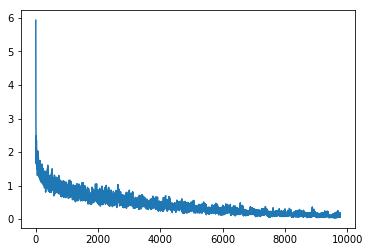

[25/30][0/391] loss = 0.050863
[25/30][1/391] loss = 0.113284
[25/30][2/391] loss = 0.120429
[25/30][3/391] loss = 0.059983
[25/30][4/391] loss = 0.103949
[25/30][5/391] loss = 0.044213
[25/30][6/391] loss = 0.040375
[25/30][7/391] loss = 0.082100
[25/30][8/391] loss = 0.054422
[25/30][9/391] loss = 0.071416
[25/30][10/391] loss = 0.104259
[25/30][11/391] loss = 0.087489
[25/30][12/391] loss = 0.085524
[25/30][13/391] loss = 0.062886
[25/30][14/391] loss = 0.086663
[25/30][15/391] loss = 0.055506
[25/30][16/391] loss = 0.069355
[25/30][17/391] loss = 0.068759
[25/30][18/391] loss = 0.066830
[25/30][19/391] loss = 0.104395
[25/30][20/391] loss = 0.075662
[25/30][21/391] loss = 0.083101
[25/30][22/391] loss = 0.087692
[25/30][23/391] loss = 0.034995
[25/30][24/391] loss = 0.039523
[25/30][25/391] loss = 0.112007
[25/30][26/391] loss = 0.070480
[25/30][27/391] loss = 0.076852
[25/30][28/391] loss = 0.074230
[25/30][29/391] loss = 0.048398
[25/30][30/391] loss = 0.089824
[25/30][31/391] lo

[25/30][261/391] loss = 0.089723
[25/30][262/391] loss = 0.072572
[25/30][263/391] loss = 0.160345
[25/30][264/391] loss = 0.097279
[25/30][265/391] loss = 0.098681
[25/30][266/391] loss = 0.094998
[25/30][267/391] loss = 0.076093
[25/30][268/391] loss = 0.080016
[25/30][269/391] loss = 0.174930
[25/30][270/391] loss = 0.100339
[25/30][271/391] loss = 0.061335
[25/30][272/391] loss = 0.128263
[25/30][273/391] loss = 0.093751
[25/30][274/391] loss = 0.118495
[25/30][275/391] loss = 0.097086
[25/30][276/391] loss = 0.076155
[25/30][277/391] loss = 0.066758
[25/30][278/391] loss = 0.143459
[25/30][279/391] loss = 0.100058
[25/30][280/391] loss = 0.097180
[25/30][281/391] loss = 0.108399
[25/30][282/391] loss = 0.058425
[25/30][283/391] loss = 0.066423
[25/30][284/391] loss = 0.075744
[25/30][285/391] loss = 0.108504
[25/30][286/391] loss = 0.079101
[25/30][287/391] loss = 0.080716
[25/30][288/391] loss = 0.104153
[25/30][289/391] loss = 0.108505
[25/30][290/391] loss = 0.063262
[25/30][29

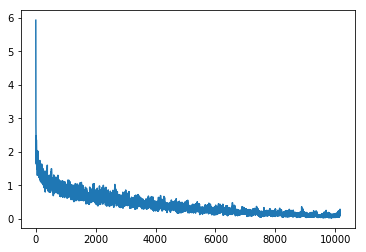

[26/30][0/391] loss = 0.063589
[26/30][1/391] loss = 0.195633
[26/30][2/391] loss = 0.120219
[26/30][3/391] loss = 0.121562
[26/30][4/391] loss = 0.089234
[26/30][5/391] loss = 0.093658
[26/30][6/391] loss = 0.075601
[26/30][7/391] loss = 0.142313
[26/30][8/391] loss = 0.140971
[26/30][9/391] loss = 0.105329
[26/30][10/391] loss = 0.110294
[26/30][11/391] loss = 0.081633
[26/30][12/391] loss = 0.135248
[26/30][13/391] loss = 0.224051
[26/30][14/391] loss = 0.147560
[26/30][15/391] loss = 0.093145
[26/30][16/391] loss = 0.068285
[26/30][17/391] loss = 0.141111
[26/30][18/391] loss = 0.095769
[26/30][19/391] loss = 0.108557
[26/30][20/391] loss = 0.171344
[26/30][21/391] loss = 0.084285
[26/30][22/391] loss = 0.092896
[26/30][23/391] loss = 0.161191
[26/30][24/391] loss = 0.137903
[26/30][25/391] loss = 0.126528
[26/30][26/391] loss = 0.137187
[26/30][27/391] loss = 0.131573
[26/30][28/391] loss = 0.098130
[26/30][29/391] loss = 0.081547
[26/30][30/391] loss = 0.107847
[26/30][31/391] lo

In [ ]:


losses = []
for epoch in range(n_epochs): 
    net.train()
    for i, (imgs,labels) in enumerate(cifar10_trainloader): 
        
        #imgs, labels = batch
        imgs, labels = imgs.to(device), labels.to(device)

        
        optimizer.zero_grad()
        
        outputs = net(imgs)
    
        loss = criterion(outputs, labels)
        loss.backward()
        
        losses.append(loss.item())
        
        optimizer.step()
        
        print("[%d/%d][%d/%d] loss = %f" % (epoch, n_epochs, i, len(cifar10_trainloader), loss.item()))
    
    # evaluate performance on testset at the end of each epoch 
    eval_net()
    
    plt.plot(losses)
    plt.show()
    
